## IBM HR Analytics Employee Attrition Modeling 

### Content

<ol>
<li>Description</li>
<li>Data Gathering</li>
<li>Data Assessment and Cleaning</li>
<li>Data Visualization</li>
<li>Features transformation</li>
<li>Data correlation</li>
<li> Machine Learning</li>
<li>Conclusion</li>
</ol>

### 1. Description

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

Data Dictionary

* Age: Age of employee <br>
* Attrition: Employee attrition status<br>
* Department: Department of work<br>
* DistanceFromHome<br>
* Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;<br>
* EducationField<br>
* EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;<br>
* JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;<br>
* MaritalStatus<br>
* MonthlyIncome<br>
* NumCompaniesWorked: Number of companies worked prior to IBM<br>
* WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;<br>
* YearsAtCompany: Current years of service in IBM<br>

Analysis Task:<br>
<ol>
<li>Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.</li>
<li>Exploratory data analysis</li>
* Find the age distribution of employees in IBM<br>
* Explore attrition by age<br>
* Explore data for Left employees<br>
* Find out the distribution of employees by the education field<br>
* Give a bar chart for the number of married and unmarried employees<br>
<li>Build up a logistic regression model to predict which employees are likely to attrite.</li>
</ol>

### 2. Data Gathering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import warnings
%matplotlib inline

In [2]:
data=pd.read_csv ("IBM Attrition Data.csv")

### 3. Data Assessment and Cleaning

In [5]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
data.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [7]:
data.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [8]:
data.isna()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  Attrition  Department  DistanceFromHome  Education  \
0     False      False       False             False      False   
1     False      False       False             False      False   
2     False      False       False             False      False   
3     False      False       False             False      False   
4     False      False       False             False      False   
...     ...        ...         ...               ...        ...   
1465  False      False       False             False      False   
1466  False      False       False             False      False   
1467  False      False       False             False      False   
1468  False      False       False             False      False   
1469  False      False       False             False      False   

      EducationField  EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  \
0              False                    False       

In [10]:
data.count()

Age                        1470
Attrition                  1470
Department                 1470
DistanceFromHome           1470
Education                  1470
EducationField             1470
EnvironmentSatisfaction    1470
JobSatisfaction            1470
MaritalStatus              1470
MonthlyIncome              1470
NumCompaniesWorked         1470
WorkLifeBalance            1470
YearsAtCompany             1470
dtype: int64

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


### 4. Data Visualization

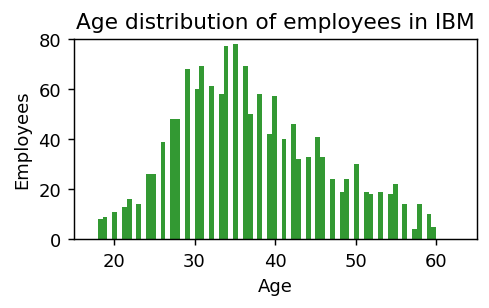

In [13]:
# histogram for age
plt.figure(figsize=(4,2), dpi=130)
data['Age'].hist(bins=70, color="green", alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Employees')
plt.title('Age distribution of employees in IBM')
plt.xlim(15, 65)
plt.ylim(0, 80)
plt.grid(False)
plt.show()

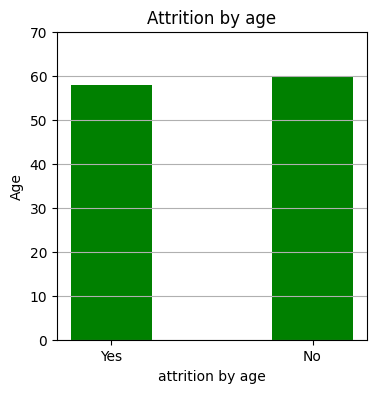

In [14]:
# Explore attrition by age
plt.figure(figsize=(4,4))
plt.bar(data.Attrition, data.Age,width=0.4,align= 'center', color="green", alpha=0.8)
plt.xlabel('attrition by age')
plt.ylabel('Age')
plt.title('Attrition by age')
plt.ylim(0, 70)
plt.grid(True, which='major',axis='y')
plt.show()

(0.0, 1400.0)

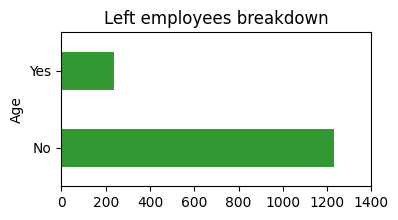

In [15]:
# data for Left employees breakdown
plt.figure(figsize=(4,2))
data.Attrition.value_counts().plot(kind="barh", color="green", alpha=0.8)
plt.ylabel('Age')
plt.title('Left employees breakdown')
plt.xlim(0, 1400)

(0.0, 700.0)

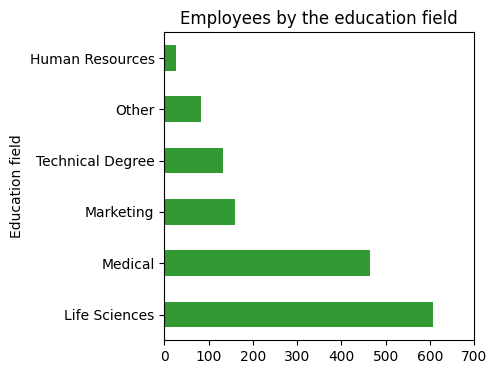

In [16]:
#Find out the distribution of employees by the education field
plt.figure(figsize=(4,4))
data.EducationField	.value_counts().plot(kind="barh", color="green", alpha=0.8)
plt.ylabel('Education field')
plt.title('Employees by the education field')
plt.xlim(0, 700)

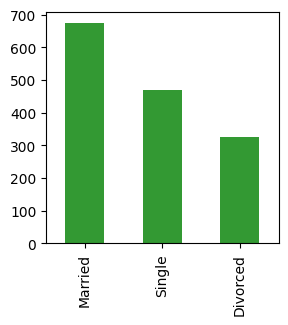

In [17]:
#Give a bar chart for the number of married and unmarried employees
plt.figure(figsize=(3,3))
data.MaritalStatus.value_counts().plot(kind="bar", color="green", alpha=0.8)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

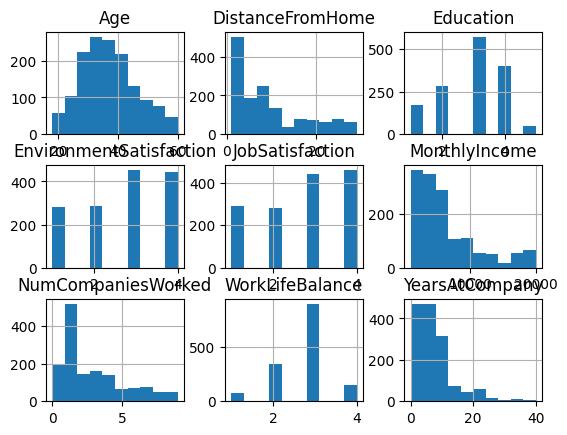

In [18]:
data.hist()
plt.show

## 5. Features transformation

In [19]:
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [20]:
data['EducationField'].value_counts()
data['EducationField'].replace("Life Sciences", 1, inplace=True)
data['EducationField'].replace("Medical", 2, inplace=True)
data['EducationField'].replace("Marketing", 3, inplace=True)
data['EducationField'].replace("Technical Degree", 4, inplace=True)
data['EducationField'].replace("Other", 5, inplace=True)
data['EducationField'].replace("Human Resources", 6, inplace=True)

In [21]:
data['Department'].value_counts()
data['Department'].replace("Research & Development",1, inplace=True)
data['Department'].replace("Sales",2, inplace=True)
data['Department'].replace("Human Resources", 3, inplace=True)

In [22]:
data['MaritalStatus'].value_counts()
data['MaritalStatus'].replace("Married", 1, inplace=True)
data['MaritalStatus'].replace("Single", 2, inplace=True)
data['MaritalStatus'].replace("Divorced",3,inplace=True)

## 6. Data correlation

In [23]:
data.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [24]:
data.corr()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.159205,-0.007652,-0.001686,0.208034,-0.030912,0.010146,-0.004892,-0.035466,0.497855,0.299635,-0.021490,0.311309
Attrition,-0.159205,1.000000,0.077351,0.077924,-0.031373,0.062320,-0.103369,-0.103481,0.011195,-0.159840,0.043494,-0.063939,-0.134392
Department,-0.007652,0.077351,1.000000,0.002196,0.019636,0.253737,-0.026110,-0.006231,-0.030818,0.056573,-0.011261,0.075507,0.029752
DistanceFromHome,-0.001686,0.077924,0.002196,1.000000,0.021042,0.006907,-0.016075,-0.003669,-0.021916,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,-0.031373,0.019636,0.021042,1.000000,0.031898,-0.027128,-0.011296,-0.000107,0.094961,0.126317,0.009819,0.069114
EducationField,-0.030912,0.062320,0.253737,0.006907,0.031898,1.000000,0.053399,-0.041443,-0.020527,-0.007231,-0.002227,0.044704,-0.019506
EnvironmentSatisfaction,0.010146,-0.103369,-0.026110,-0.016075,-0.027128,0.053399,1.000000,-0.006784,0.022628,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.103481,-0.006231,-0.003669,-0.011296,-0.041443,-0.006784,1.000000,-0.001494,-0.007157,-0.055699,-0.019459,-0.003803
MaritalStatus,-0.035466,0.011195,-0.030818,-0.021916,-0.000107,-0.020527,0.022628,-0.001494,1.000000,-0.018836,0.031652,-0.000751,-0.014779
MonthlyIncome,0.497855,-0.159840,0.056573,-0.017014,0.094961,-0.007231,-0.006259,-0.007157,-0.018836,1.000000,0.149515,0.030683,0.514285


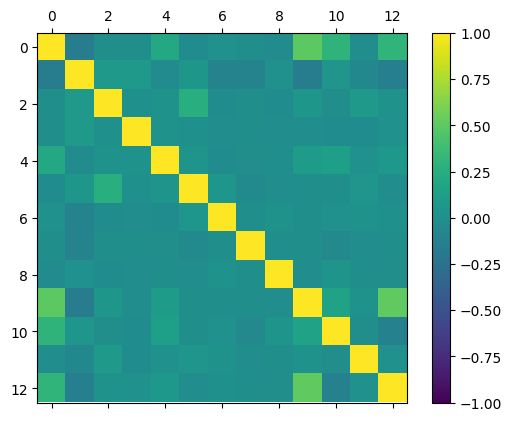

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation = 'none')
fig.colorbar(cax)
plt.show()

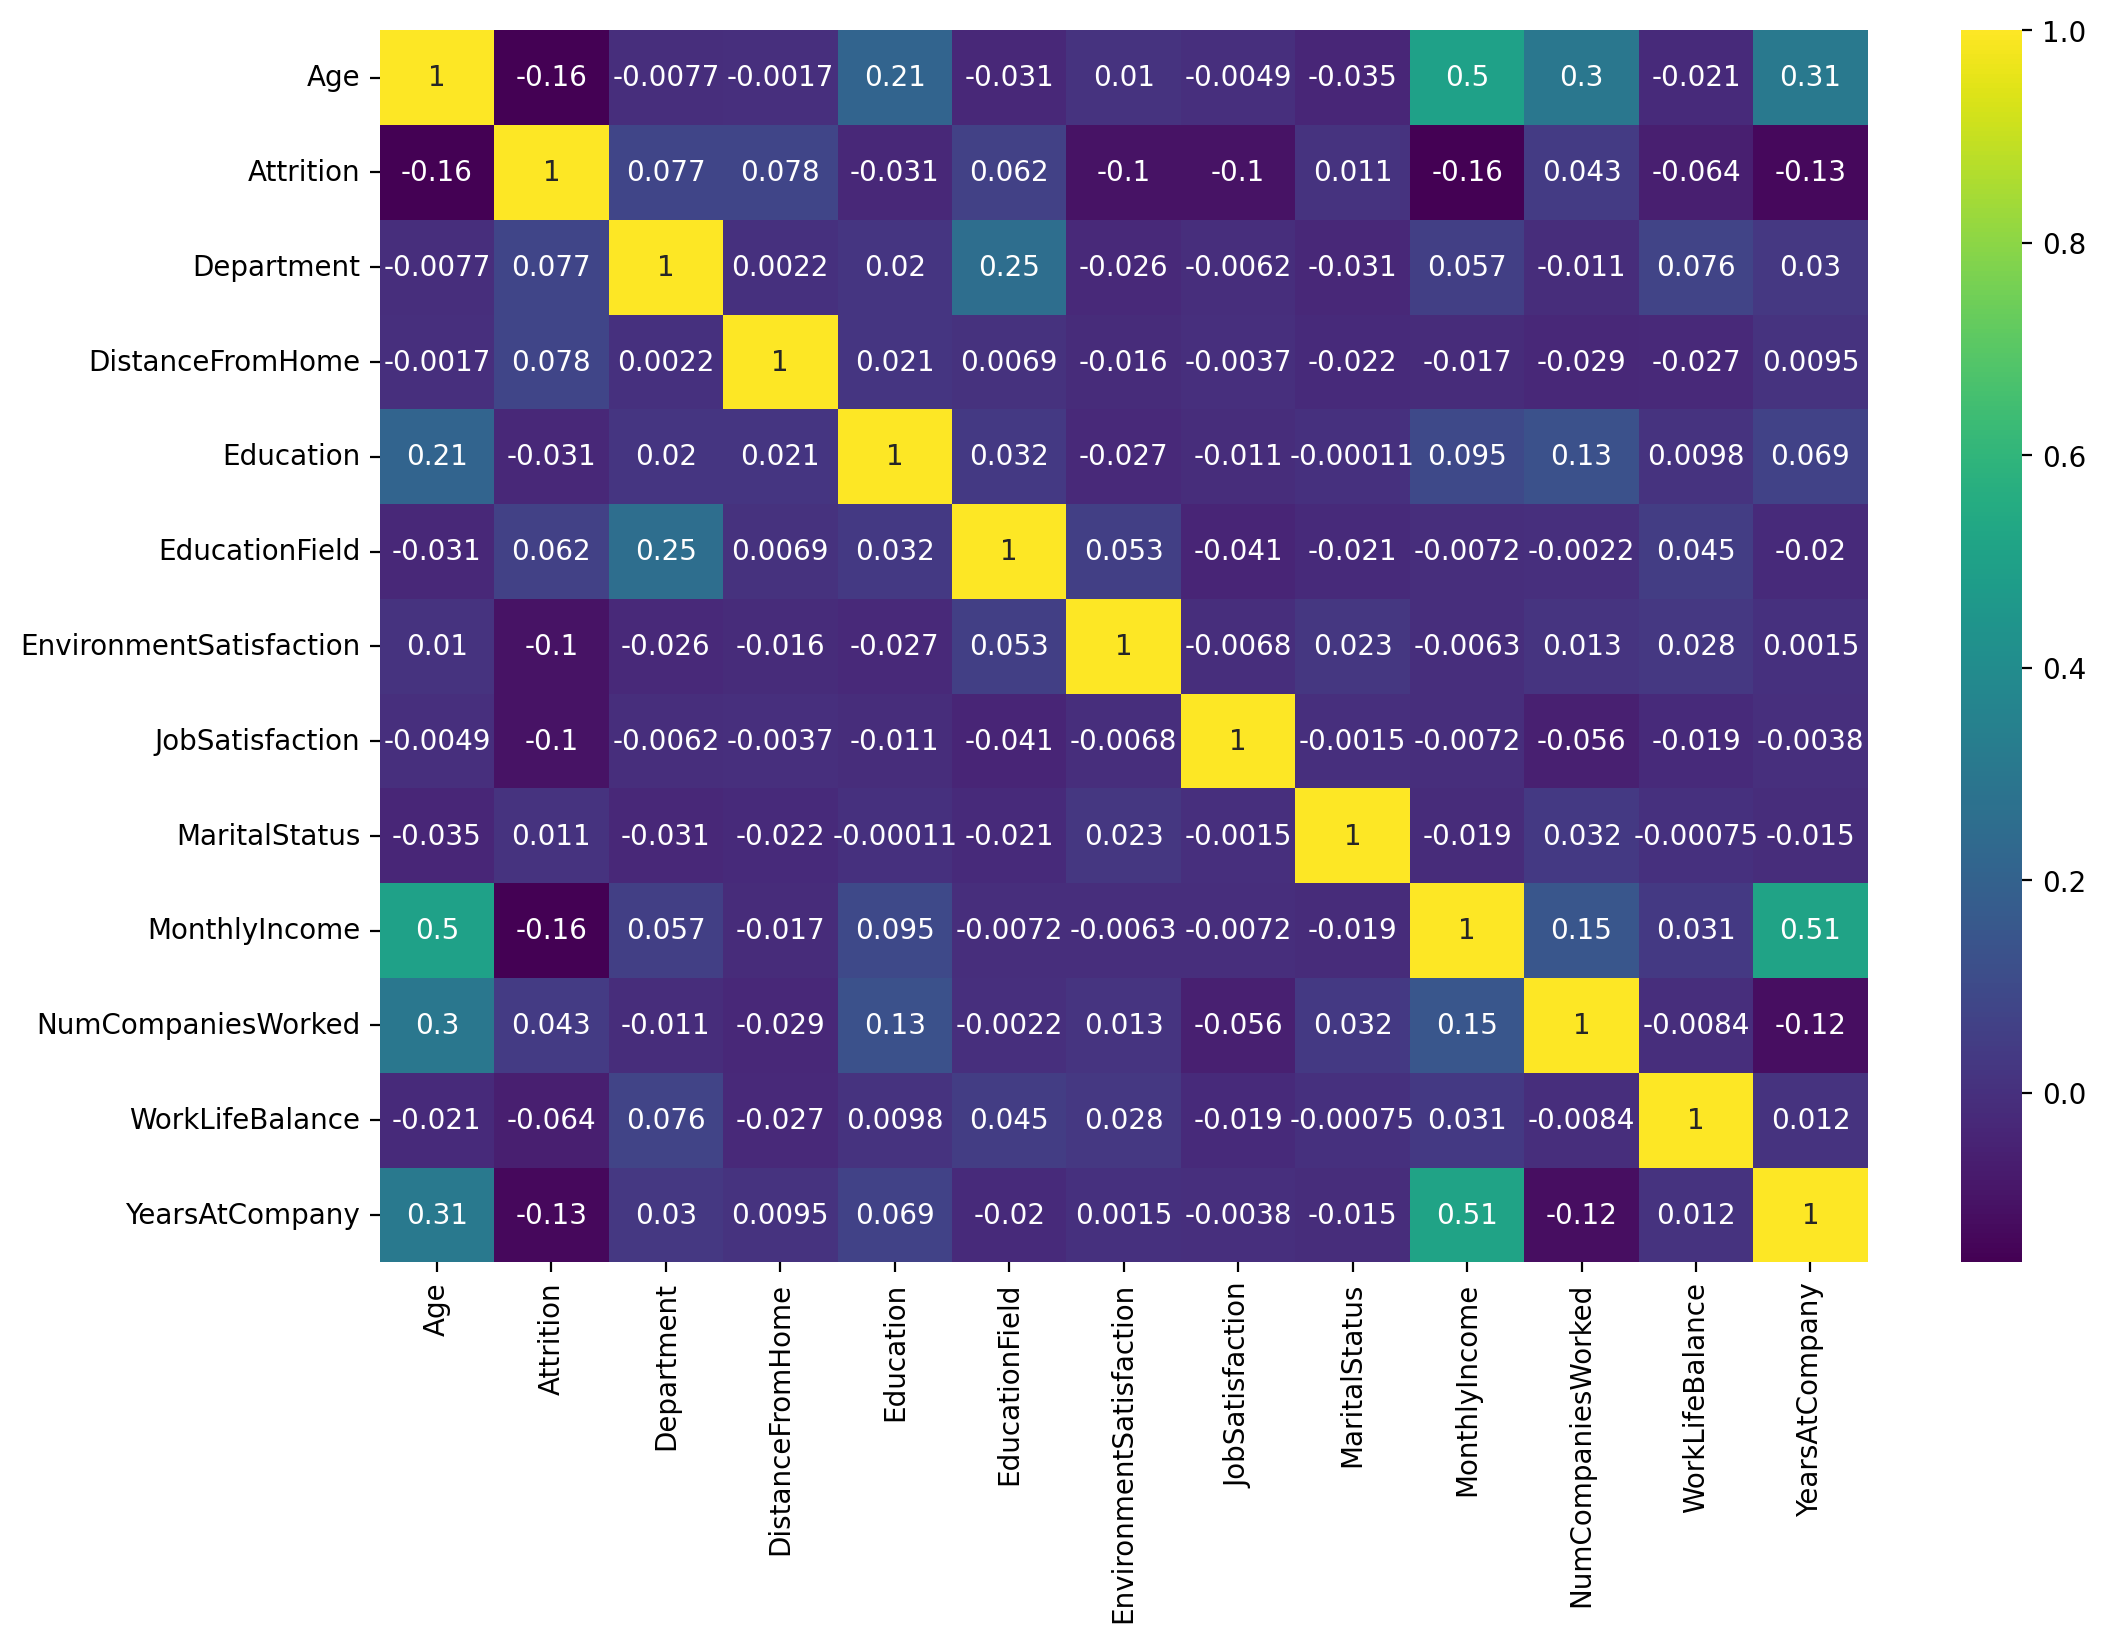

In [26]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data.corr(), annot=True, cmap='viridis');

## 7. Machine Learning
### Train | Test Split and Scaling | Logistic regression model

#### MODEL 1 - Considering all features

In [27]:
x1= data.drop('Attrition', axis=1)
y1= data['Attrition']

In [28]:
#Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledx1 = scaler.fit_transform(x1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(rescaledx1, y1, test_size=0.3, random_state=0)

In [30]:
len(x_train), len(x_test)

(1029, 441)

In [31]:
#Create a StandardScaler object and normalize the X train and test set feature data.

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [32]:
# Build up a logistic regression model to predict which employees are likely to attrite using all feature
model = LogisticRegression(solver='lbfgs', max_iter=400)
model = model.fit(scaled_x_train, y_train)
model.score(scaled_x_train, y_train)

0.8425655976676385

In [33]:
result = model.score(x_test, y_test)
print("Acuracy: %.3f%%" % (result * 100.0))

Acuracy: 84.127%


In [34]:
model.coef_

array([[-0.41511635,  0.18776548,  0.18634739, -0.00773196,  0.1880547 ,
        -0.30611177, -0.25627032,  0.04590984, -0.47240713,  0.28862919,
        -0.25390895, -0.18409985]])

In [35]:
y_pred = model.predict(scaled_x_test)

In [36]:
probs = model.predict_proba(scaled_x_test)
print(probs)

[[0.89800517 0.10199483]
 [0.86812413 0.13187587]
 [0.82941792 0.17058208]
 [0.88254263 0.11745737]
 [0.82134436 0.17865564]
 [0.84069095 0.15930905]
 [0.80901694 0.19098306]
 [0.71326201 0.28673799]
 [0.97997594 0.02002406]
 [0.8645077  0.1354923 ]
 [0.98405978 0.01594022]
 [0.83467734 0.16532266]
 [0.93226189 0.06773811]
 [0.62952567 0.37047433]
 [0.89567715 0.10432285]
 [0.91079089 0.08920911]
 [0.89910738 0.10089262]
 [0.88048393 0.11951607]
 [0.91223593 0.08776407]
 [0.6272244  0.3727756 ]
 [0.68873723 0.31126277]
 [0.96226347 0.03773653]
 [0.91947933 0.08052067]
 [0.93722809 0.06277191]
 [0.52421079 0.47578921]
 [0.82773142 0.17226858]
 [0.86156417 0.13843583]
 [0.94659066 0.05340934]
 [0.62504169 0.37495831]
 [0.88394281 0.11605719]
 [0.95606806 0.04393194]
 [0.69446329 0.30553671]
 [0.83969856 0.16030144]
 [0.92658454 0.07341546]
 [0.95730848 0.04269152]
 [0.937829   0.062171  ]
 [0.92395873 0.07604127]
 [0.85698474 0.14301526]
 [0.96110293 0.03889707]
 [0.87145563 0.12854437]


In [37]:
# Model Performance Evaluation
confusion_matrix(y_test, y_pred)

array([[367,   4],
       [ 67,   3]])

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


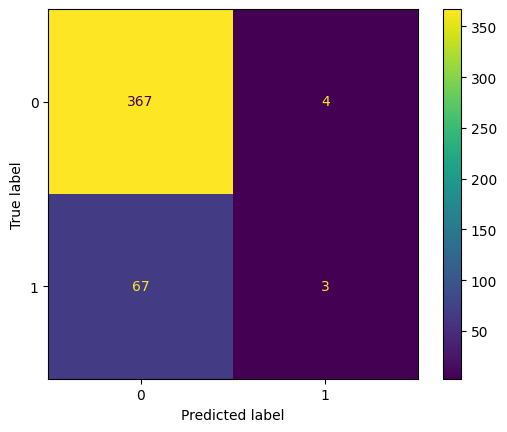

In [17]:
plot_confusion_matrix(model, scaled_x_test, y_test);

We can see 71 mistakes

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[367   4]
 [ 67   3]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.43      0.04      0.08        70

    accuracy                           0.84       441
   macro avg       0.64      0.52      0.49       441
weighted avg       0.78      0.84      0.78       441



In [39]:
#Coefficients
coef = pd.Series(data=model.coef_[0], index=x1.columns)
coef

Age                       -0.415116
Department                 0.187765
DistanceFromHome           0.186347
Education                 -0.007732
EducationField             0.188055
EnvironmentSatisfaction   -0.306112
JobSatisfaction           -0.256270
MaritalStatus              0.045910
MonthlyIncome             -0.472407
NumCompaniesWorked         0.288629
WorkLifeBalance           -0.253909
YearsAtCompany            -0.184100
dtype: float64

In [40]:
coef=coef.sort_values()
coef

MonthlyIncome             -0.472407
Age                       -0.415116
EnvironmentSatisfaction   -0.306112
JobSatisfaction           -0.256270
WorkLifeBalance           -0.253909
YearsAtCompany            -0.184100
Education                 -0.007732
MaritalStatus              0.045910
DistanceFromHome           0.186347
Department                 0.187765
EducationField             0.188055
NumCompaniesWorked         0.288629
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'MonthlyIncome'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'EnvironmentSatisfaction'),
  Text(3, 0, 'JobSatisfaction'),
  Text(4, 0, 'WorkLifeBalance'),
  Text(5, 0, 'YearsAtCompany'),
  Text(6, 0, 'Education'),
  Text(7, 0, 'MaritalStatus'),
  Text(8, 0, 'DistanceFromHome'),
  Text(9, 0, 'Department'),
  Text(10, 0, 'EducationField'),
  Text(11, 0, 'NumCompaniesWorked')])

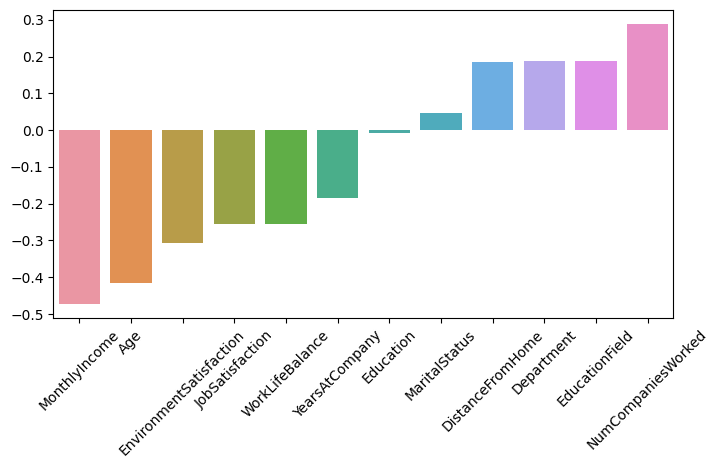

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(x=coef.index, y=coef.values)
plt.xticks(rotation=45)

In [ ]:
#Performance Curves
#Create both the precision recall curve and the ROC Curve.

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


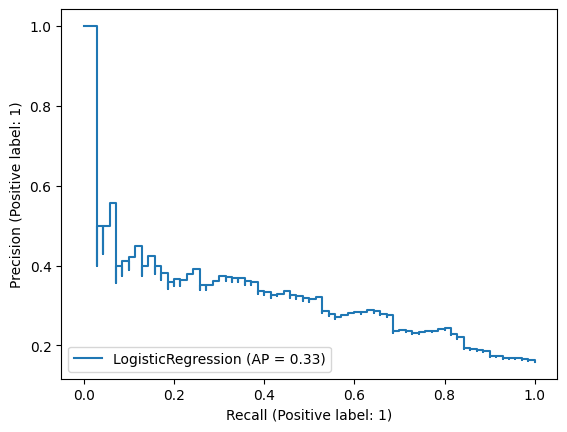

In [42]:
plot_precision_recall_curve(model, scaled_x_test, y_test);

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


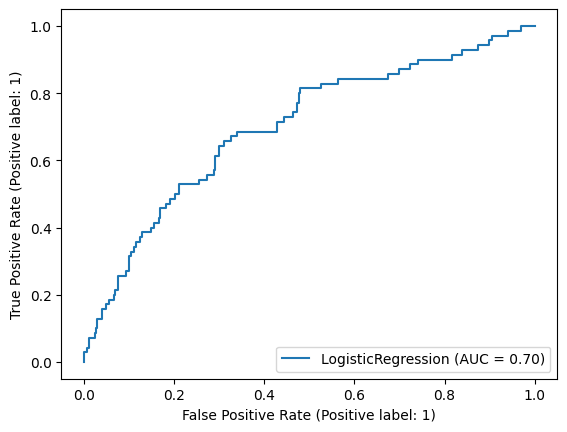

In [43]:
plot_roc_curve(model, scaled_x_test, y_test);

#### MODEL 2 - Considering features with positive correlation

In [44]:
x2 = data[['Age', 'Education', 'EnvironmentSatisfaction', 'JobSatisfaction',
         'MonthlyIncome', 'WorkLifeBalance','YearsAtCompany']]
y2 = data['Attrition']

In [45]:
#Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledx2 = scaler.fit_transform(x2)

In [46]:
x2_train, x2_test, y2_train, y2_test = train_test_split(rescaledx2, y2, test_size=0.3, random_state=0)

scaler = StandardScaler()

scaled_x2_train = scaler.fit_transform(x2_train)
scaled_x2_test = scaler.transform(x2_test)

In [47]:
model2 = LogisticRegression(solver='lbfgs', max_iter=400)
model2 = model2.fit(scaled_x2_train, y2_train)
model2.score(scaled_x2_train, y2_train)

0.8396501457725948

In [48]:
result = model2.score(x2_test, y2_test)
print("Acuracy: %.3f%%" % (result * 100.0))

Acuracy: 84.127%


In [49]:
model2.coef_

array([[-0.3247462 ,  0.01792488, -0.27875117, -0.25687372, -0.37146418,
        -0.23547621, -0.26907061]])

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.33      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.59      0.50      0.47       441
weighted avg       0.76      0.84      0.77       441



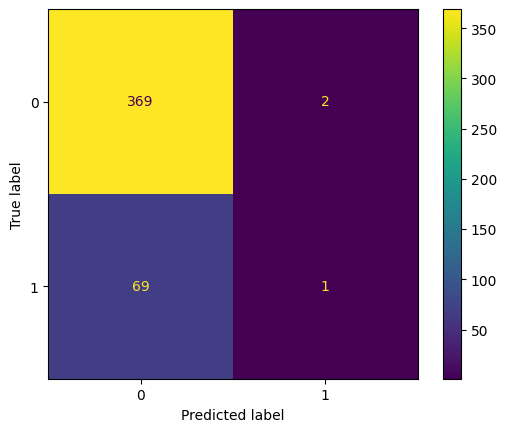

In [50]:
# Model Performance Evaluation
y2_pred = model2.predict(scaled_x2_test)
confusion_matrix(y2_test, y2_pred)
plot_confusion_matrix(model2, scaled_x2_test, y2_test)
print(classification_report(y2_test, y2_pred,zero_division='warn'))

We can see 71 mistakes

In [51]:
#Coefficients
coef = pd.Series(data=model2.coef_[0], index=x2.columns)
coef

Age                       -0.324746
Education                  0.017925
EnvironmentSatisfaction   -0.278751
JobSatisfaction           -0.256874
MonthlyIncome             -0.371464
WorkLifeBalance           -0.235476
YearsAtCompany            -0.269071
dtype: float64

In [52]:
coef=coef.sort_values()
coef

MonthlyIncome             -0.371464
Age                       -0.324746
EnvironmentSatisfaction   -0.278751
YearsAtCompany            -0.269071
JobSatisfaction           -0.256874
WorkLifeBalance           -0.235476
Education                  0.017925
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MonthlyIncome'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'EnvironmentSatisfaction'),
  Text(3, 0, 'YearsAtCompany'),
  Text(4, 0, 'JobSatisfaction'),
  Text(5, 0, 'WorkLifeBalance'),
  Text(6, 0, 'Education')])

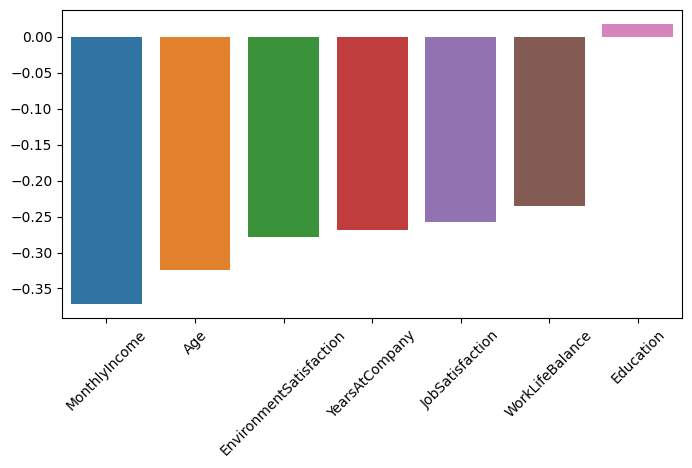

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(x=coef.index, y=coef.values)
plt.xticks(rotation=45)

In [ ]:
#Performance Curves
#Create both the precision recall curve and the ROC Curve.

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


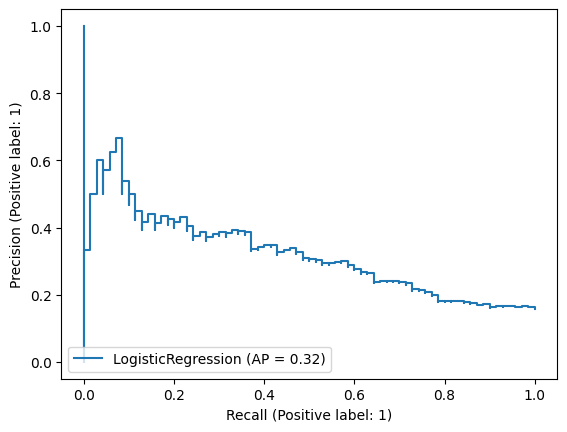

In [54]:
plot_precision_recall_curve(model2, scaled_x2_test, y2_test);

#### MODEL 3 - Considering RFE for feature selection

In [56]:
data2 = data [['Attrition', 'Age','Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany']]

In [57]:
data2.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,1,41,2,1,2,1,2,4,2,5993,8,1,6
1,0,49,1,8,1,1,3,2,1,5130,1,3,10
2,1,37,1,2,2,5,4,3,2,2090,6,3,0
3,0,33,1,3,4,1,4,3,1,2909,1,3,8
4,0,27,1,2,1,2,1,2,1,3468,9,3,2


In [58]:
x3 = data2.iloc [:,1:12]
y3 = data2.iloc [:,0]

In [59]:
#Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledx3 = scaler.fit_transform(x3)
print(rescaledx3[0:5,:])

[[0.54761905 0.5        0.         0.25       0.         0.33333333
  1.         0.5        0.26245392 0.88888889 0.        ]
 [0.73809524 0.         0.25       0.         0.         0.66666667
  0.33333333 0.         0.21700895 0.11111111 0.66666667]
 [0.45238095 0.         0.03571429 0.25       0.8        1.
  0.66666667 0.5        0.0569247  0.66666667 0.66666667]
 [0.35714286 0.         0.07142857 0.75       0.         1.
  0.66666667 0.         0.10005266 0.11111111 0.66666667]
 [0.21428571 0.         0.03571429 0.         0.2        0.
  0.33333333 0.         0.1294892  1.         0.66666667]]


In [60]:
modelo3 = LogisticRegression(solver='lbfgs', max_iter=400)

In [61]:
# RFE
rfe = RFE(estimator = modelo3, n_features_to_select=7)
fit = rfe.fit(rescaledx3, y3)

# Print dos resultados
print("Number of features: %d" % fit.n_features_)
print(data2.columns[1:12])
print("Features selected: %s" % fit.support_)
print("Features Ranking: %s" % fit.ranking_)

Number of features: 7
Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance'],
      dtype='object')
Features selected: [ True  True False False False  True  True False  True  True  True]
Features Ranking: [1 1 2 4 3 1 1 5 1 1 1]


In [62]:
x4= data2 [['Age', 'Department','EnvironmentSatisfaction', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance']]
y4 = data2 ['Attrition']

In [63]:
#Normalization
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledx4 = scaler.fit_transform(x4)

In [64]:
x4_train, x4_test, y4_train, y4_test = train_test_split(rescaledx4, y4, test_size=0.3, random_state=763)

scaler = StandardScaler()

scaled_x4_train = scaler.fit_transform(x4_train)
scaled_x4_test = scaler.transform(x4_test)

In [65]:
model4 = LogisticRegression(solver='lbfgs', max_iter=400)
model4 = model4.fit(scaled_x4_train, y4_train)
model4.score(scaled_x4_train, y4_train)

0.8542274052478134

In [66]:
result = model4.score(x4_test, y4_test)
print("Acuracy: %.3f%%" % (result * 100.0))

Acuracy: 81.859%


/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.99      0.90       361
           1       0.50      0.03      0.05        80

    accuracy                           0.82       441
   macro avg       0.66      0.51      0.47       441
weighted avg       0.76      0.82      0.75       441



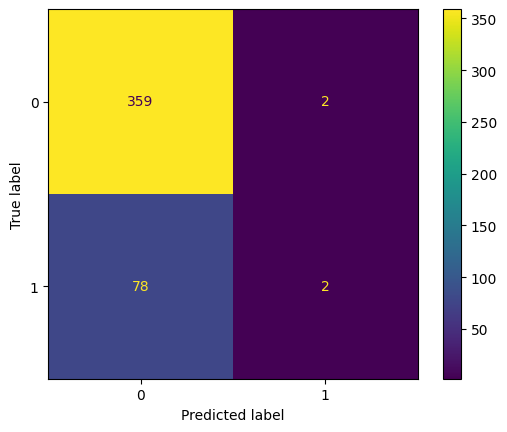

In [67]:
# Model Performance Evaluation
y4_pred = model4.predict(scaled_x4_test)
confusion_matrix(y4_test, y4_pred)
plot_confusion_matrix(model4, scaled_x4_test, y4_test)
print(classification_report(y4_test, y4_pred))

We can see 80 mistakes

In [ ]:
#Performance Curves
#Create both the precision recall curve and the ROC Curve.

/Users/liviasimoes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


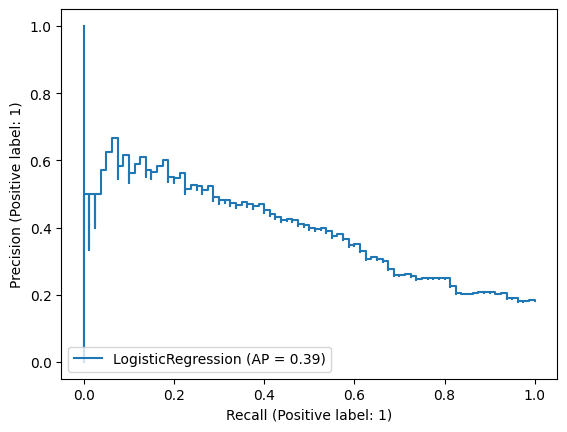

In [72]:
plot_precision_recall_curve(model4, scaled_x4_test, y4_test);

## 8. Conclusion

Comparing the three models tested, Model 1 performed high results values of precision, recall and f1-score.

Final Task: An Employee with the following features<br>
Age: 28<br>
Department: 4<br>
DistanceFromHome: 5<br>
Education: 3 <br>
EducationField:4<br>
EnvironmentSatisfaction: 1<br>
JobSatisfaction: 2<br>
MaritalStatus:2<br>
MonthlyIncome: 3 <br>
NumCompaniesWorked: 6<br>
WorkLifeBalance:3<br>
YearsAtCompany:5<br>

In [74]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[28,4, 5, 3, 4, 1, 2, 2, 3, 6, 3, 5]]
print(model.predict_proba(kk))

[[9.99998261e-01 1.73909554e-06]]


The model predict that the patient belong to target class 0 way more than class 1.